In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# LOOK AT AVG PERFORMANCE OVER 25 RUNS
counts = list(range(1, 26))
data = []
for c in counts:
    path = "standard_3_euclidean_10_standard_0_0_0.0_0.0_80_{}.npy".format(c)
    data.append(np.load(path, allow_pickle=True).tolist())
    
MSEs = [np.mean(val["MSE"]) for val in data]
new_wins = [np.mean(val["new_added_wins"]) for val in data]

# Print the values
print("MSE: {:.3f} +/- {:.3f}".format(np.mean(MSEs), np.std(MSEs)))
print("Extra Wins Per Draft Pick: {:.3f} +/- {:.3f}".format(np.mean(new_wins), np.std(new_wins)))

MSE: 2.435 +/- 0.000
Extra Wins Per Draft Pick: 0.780 +/- 0.000


In [7]:
US_sizes = [0]
OS_vals = [2.0, 2.5, 3.0, 3.5, 4.0]
US_vals = [0.0]
OS_sizes = [0, 50, 100, 150, 200, 250]
n_neighbours = [80]
# Load the data in 
data = []
params = []
for OS_val in OS_vals:
    for US_val in US_vals:
        for OS_size in OS_sizes:
            for US_size in US_sizes:
                path = "standard_3_euclidean_10_standard_{}_{}_{}_{}_{}.npy".format(OS_size, US_size, 
                                                                                 OS_val, US_val, n_neighbours[0])
                data.append(np.load(path, allow_pickle=True).tolist())
                params.append({"OS_val":OS_val, "US_val":US_val, "OS_size":OS_size, "US_size":US_size})
                
data2 = []
params2 = []
for OS_val in OS_vals:
    for US_val in US_vals:
        for OS_size in OS_sizes:
            for US_size in US_sizes:
                path = "standard_3_euclidean_10_standard_{}_{}_{}_{}_{}.npy".format(OS_size, US_size, 
                                                                                 OS_val, US_val, n_neighbours[0])
                data2.append(np.load(path, allow_pickle=True).tolist())
                params2.append({"OS_val":OS_val, "US_val":US_val, "OS_size":OS_size, "US_size":US_size})
                
MSEs = [np.mean([val1["MSE"],val2["MSE"]]) for val1, val2 in zip(data,data2)]
added_wins = [np.mean([np.mean(val1["added_wins_per_team"]),np.mean(val2["added_wins_per_team"])]) for 
              val1, val2 in zip(data,data2)]
new_wins = [np.mean([np.mean(val1["new_added_wins"]),np.mean(val2["new_added_wins"])]) for 
            val1, val2 in zip(data,data2)]          

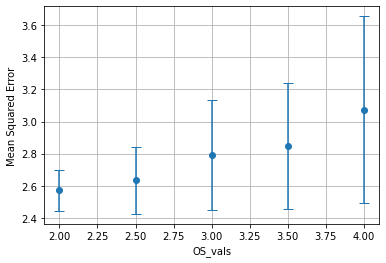

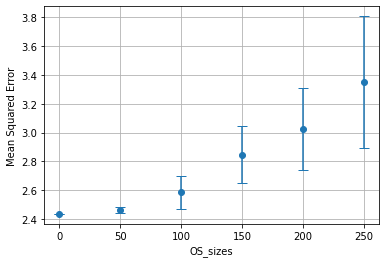

In [8]:
# Plot just the average values for each parameter
#### MSE STUFF ####
OS_val_data = [[] for i in range(len(OS_vals))]
OS_size_data = [[] for i in range(len(OS_sizes))]
for i, p in enumerate(params):
    OS_val_data[OS_vals.index(p['OS_val'])].append(MSEs[i])
    OS_size_data[OS_sizes.index(p['OS_size'])].append(MSEs[i])

OS_val_avg = [np.mean(val) for val in OS_val_data]
OS_size_avg = [np.mean(val) for val in OS_size_data]
OS_val_std = [np.std(val) for val in OS_val_data]
OS_size_std = [np.std(val) for val in OS_size_data]

metric = "Mean Squared Error"
plt.figure()
plt.errorbar(x=OS_vals, y=OS_val_avg, yerr=OS_val_std, fmt="o",  capsize=5)
plt.xlabel("OS_vals")
plt.ylabel(metric)
plt.grid()

plt.figure()
plt.errorbar(x=OS_sizes, y=OS_size_avg, yerr=OS_size_std, fmt="o", capsize=5)
plt.xlabel("OS_sizes")
plt.ylabel(metric)
plt.grid()

plt.show()

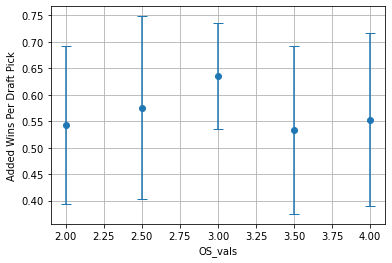

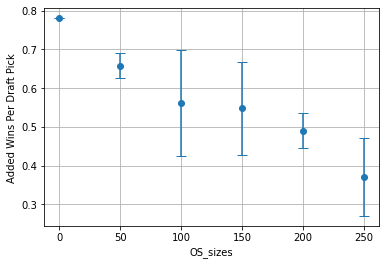

In [9]:
#### NEW WINS STUFF ####
OS_val_data = [[] for i in range(len(OS_vals))]
OS_size_data = [[] for i in range(len(OS_sizes))]
for i, p in enumerate(params):
    OS_val_data[OS_vals.index(p['OS_val'])].append(new_wins[i])
    OS_size_data[OS_sizes.index(p['OS_size'])].append(new_wins[i])

OS_val_avg = [np.mean(val) for val in OS_val_data]
OS_size_avg = [np.mean(val) for val in OS_size_data]
OS_val_std = [np.std(val) for val in OS_val_data]
OS_size_std = [np.std(val) for val in OS_size_data]

metric = "Added Wins Per Draft Pick"
plt.figure()
plt.errorbar(x=OS_vals, y=OS_val_avg, yerr=OS_val_std, fmt="o",  capsize=5)
plt.xlabel("OS_vals")
plt.ylabel(metric)
plt.grid()

plt.figure()
plt.errorbar(x=OS_sizes, y=OS_size_avg, yerr=OS_size_std, fmt="o", capsize=5)
plt.xlabel("OS_sizes")
plt.ylabel(metric)
plt.grid()

plt.show()

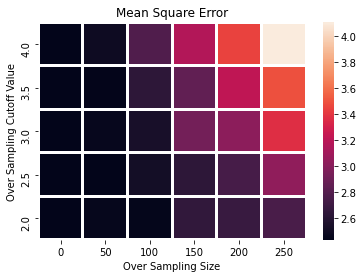

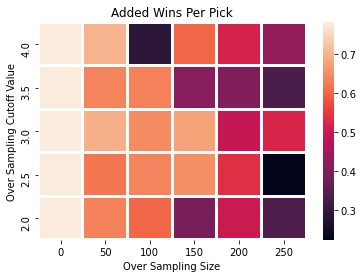

In [10]:
# Do the heatmaps
ax = sns.heatmap(np.array(MSEs).reshape((len(OS_vals),len(OS_sizes))), xticklabels=OS_sizes, yticklabels=OS_vals, linewidth=2)
ax.invert_yaxis()
plt.title("Mean Square Error")
plt.ylabel("Over Sampling Cutoff Value")
plt.xlabel("Over Sampling Size")
plt.show()

ax = sns.heatmap(np.array(new_wins).reshape((len(OS_vals),len(OS_sizes))), xticklabels=OS_sizes, yticklabels=OS_vals, linewidth=2)
ax.invert_yaxis()
plt.title("Added Wins Per Pick")
plt.ylabel("Over Sampling Cutoff Value")
plt.xlabel("Over Sampling Size")
plt.show()

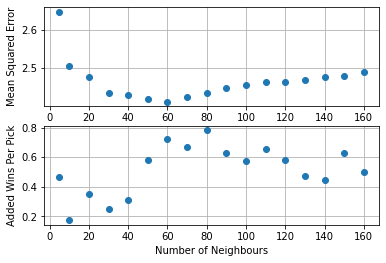

In [19]:
# Do the nearest neighbours stuff 
n_neighbours = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]

# Load the data in 
data = []
params = []
for n in n_neighbours:
    path = "standard_3_euclidean_10_standard_0_0_0.0_0.0_{}.npy".format(n)
    data.append(np.load(path, allow_pickle=True).tolist())
    
MSEs = [np.mean(val["MSE"]) for val in data]
new_wins = [np.mean(val["new_added_wins"]) for val in data]

ax1 = plt.subplot(211)
plt.plot(n_neighbours, MSEs, "o")
plt.grid()
plt.ylabel("Mean Squared Error")


ax2 = plt.subplot(212, sharex=ax1)
plt.plot(n_neighbours, new_wins, "o")
plt.grid()
plt.ylabel("Added Wins Per Pick")
plt.xlabel("Number of Neighbours")
plt.show()

In [16]:
data

[]